### Set 3 

Print six scatterplots (1 per district) showing the number of crimes (y-axis) per day (x-axis) for entries dated from January 21 to 31 in each specific district.

In [1]:
import numpy as np
import matplotlib, datetime
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r'D:\SPARTA\05 Python for Data Engineering\week 5\crime.csv')
data

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,1/1/2006 0:00,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,1/1/2006 0:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,1/1/2006 0:00,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101
3,1/1/2006 0:00,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
4,1/1/2006 0:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613
...,...,...,...,...,...,...,...,...,...
7579,1/31/2006 23:36,26TH ST / G ST,3,3B,728,594(B)(2)(A) VANDALISM/ -$400,2999,38.577832,-121.470460
7580,1/31/2006 23:40,4011 FREEPORT BLVD,4,4A,957,459 PC BURGLARY BUSINESS,2203,38.537591,-121.492591
7581,1/31/2006 23:41,30TH ST / K ST,3,3C,841,TRAFFIC-ACCIDENT INJURY,5400,38.572030,-121.467012
7582,1/31/2006 23:45,5303 FRANKLIN BLVD,4,4B,969,3056 PAROLE VIO - I RPT,7000,38.527187,-121.471248


In [3]:
#convert cdatetime column times to midnight since time does not matter
data['cdatetime'] = pd.to_datetime(data['cdatetime']).dt.normalize()
data['cdatetime']

0      2006-01-01
1      2006-01-01
2      2006-01-01
3      2006-01-01
4      2006-01-01
          ...    
7579   2006-01-31
7580   2006-01-31
7581   2006-01-31
7582   2006-01-31
7583   2006-01-31
Name: cdatetime, Length: 7584, dtype: datetime64[ns]

In [4]:
new_data = data.loc[data['cdatetime'] >= pd.to_datetime('2006-01-21')].copy()  # extract data with date Jan21 - 31, 2006
new_data

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
4923,2006-01-21,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY BUSINESS,2203,38.637448,-121.384613
4924,2006-01-21,3421 AUBURN BLVD,2,2A,508,10851(A)VC TAKE VEH W/O OWNER,2404,38.637448,-121.384613
4925,2006-01-21,251 MCDANIEL CIR,2,2A,501,459 PC BURGLARY VEHICLE,2299,38.636367,-121.460985
4926,2006-01-21,1400 RESPONSE RD,2,2C,626,459 PC BURGLARY VEHICLE,2299,38.596914,-121.437994
4927,2006-01-21,6259 JACINTO AVE,5,5C,1653,459 PC BURGLARY VEHICLE,2299,38.444309,-121.430353
...,...,...,...,...,...,...,...,...,...
7579,2006-01-31,26TH ST / G ST,3,3B,728,594(B)(2)(A) VANDALISM/ -$400,2999,38.577832,-121.470460
7580,2006-01-31,4011 FREEPORT BLVD,4,4A,957,459 PC BURGLARY BUSINESS,2203,38.537591,-121.492591
7581,2006-01-31,30TH ST / K ST,3,3C,841,TRAFFIC-ACCIDENT INJURY,5400,38.572030,-121.467012
7582,2006-01-31,5303 FRANKLIN BLVD,4,4B,969,3056 PAROLE VIO - I RPT,7000,38.527187,-121.471248


In [5]:
dist = new_data[['cdatetime','district','address']].groupby(['cdatetime','district'], as_index = False).agg('count')
dist.rename(columns = {'address' : 'NoOfCrimes'}, inplace=True)  #rename column
dist['Day'] =  dist['cdatetime'].apply(lambda x: x.strftime("%d-%b")) # Get Month/Day to make it readable on the chart
dist

,cdatetime,district,NoOfCrimes,Day
0,2006-01-21,1,27,21-Jan
1,2006-01-21,2,44,21-Jan
2,2006-01-21,3,41,21-Jan
3,2006-01-21,4,25,21-Jan
4,2006-01-21,5,34,21-Jan
...,...,...,...,...
61,2006-01-31,2,39,31-Jan
62,2006-01-31,3,60,31-Jan
63,2006-01-31,4,30,31-Jan
64,2006-01-31,5,48,31-Jan


In [6]:
ltdist = dist['district'].unique()  #get district 
ltdist

array([1, 2, 3, 4, 5, 6], dtype=int64)

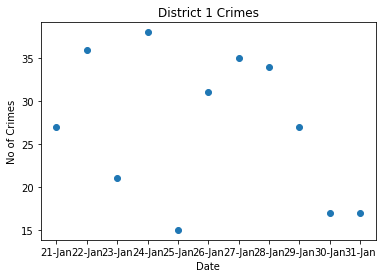

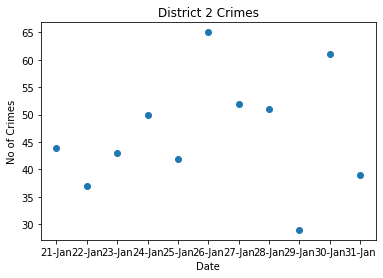

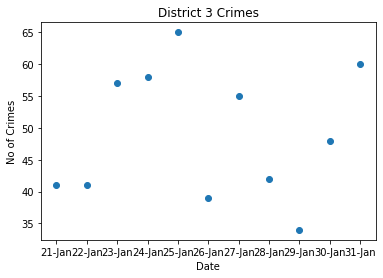

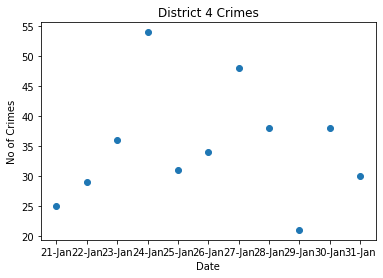

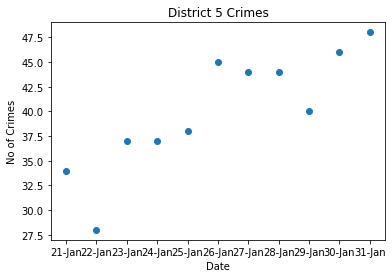

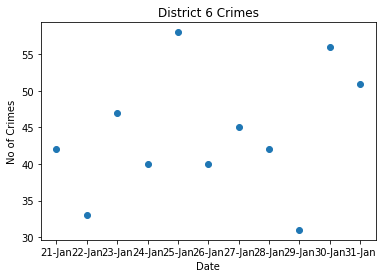

In [7]:
#use the column names as keys to access the corresponding rows
day = "Day"
NoOfCrimes  = "NoOfCrimes"

for d in ltdist:  #iterate district
    new_dist = dist[dist["district"] == d]
    ax = plt.gca()
    ax.scatter(new_dist[day], new_dist[NoOfCrimes])
    ax.set_xlabel("Date")
    ax.set_ylabel("No of Crimes")
    ax.set_title("District {} Crimes".format(d))
    plt.show()